In [341]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from scipy.optimize import curve_fit
from scipy import integrate

In [412]:
x = np.random.normal(size=(2, 500))#.view(np.complex128)
z = x[0, :] * x[1, :]

x2 = np.random.normal(size=(2, 500))#.view(np.complex128)
z2 = x2[0, :] * x2[1, :]

n = z.real-z2.real

In [385]:
def abs_cnn_dist(r_z, s):
    u = (2*r_z)/(s)
    p = ((2*r_z)/(np.pi*(s**2)))*special.kn(0, u)
    area = integrate.quad(lambda x: ((2*x)/(np.pi*(s**2)))*special.kn(0, (2*x)/(s)), 0, np.inf)
    return p/area[0]

In [386]:
def real_cnn_dist(z, s):
    a = 1/((s**2))
    b = -np.abs(2*z)/((s**2))
    return a*np.exp(b)

In [422]:
def cnn_null_pdf(x, s):
    return (1/(2*s**4))*np.exp(-2*np.abs(x)/(s**2))*(s**2+2*np.abs(x))

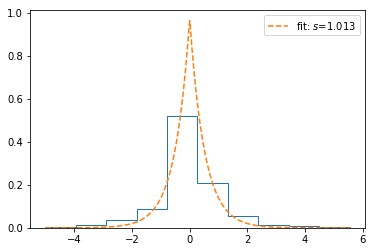

In [425]:
y, x = np.histogram(z.real, bins='auto', density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

popt, pcov = curve_fit(real_cnn_dist, x, y, p0=[1])
# popt, pcov = curve_fit(real_cnn_dist, x, y)

plt.figure()
plt.hist(z.real, density=True, histtype='step')
fitx = np.linspace(min(z.real), max(z.real), 500)
plt.plot(fitx, real_cnn_dist(fitx, *popt), '--',
         label='fit: $s$=%5.3f' % tuple(popt))
# plt.plot(fitx, real_cnn_dist(fitx, 1))
plt.legend()
plt.show()

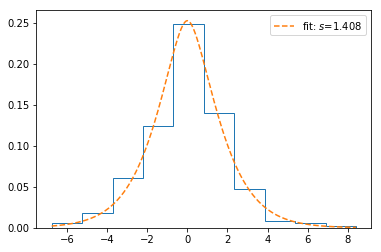

In [426]:
y, x = np.histogram(n, bins='auto', density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

popt, pcov = curve_fit(cnn_null_pdf, x, y, p0=[1])

plt.figure()
plt.hist(n.real, density=True, histtype='step')
fitx = np.linspace(min(n.real), max(n.real), 500)
plt.plot(fitx, cnn_null_pdf(fitx, *popt), '--',
         label='fit: $s$=%5.3f' % tuple(popt))
# plt.plot(fitx, real_cnn_dist(fitx, 1))
plt.legend()
plt.show()

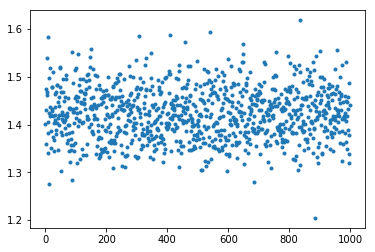

In [427]:
s = []
for i in range(1000):
    x = np.random.normal(size=(2, 500)).view(np.complex128)
    z = x[0, :] * x[1, :]
    x2 = np.random.normal(size=(2, 500)).view(np.complex128)
    z2 = x2[0, :] * x2[1, :]
    n = z.real-z2.real
    y, x = np.histogram(n.real, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    popt, pcov = curve_fit(cnn_null_pdf, x, y, p0=[1])
    s.append(popt[0])
plt.plot(np.linspace(0, len(s)-1, len(s)), s, '.')

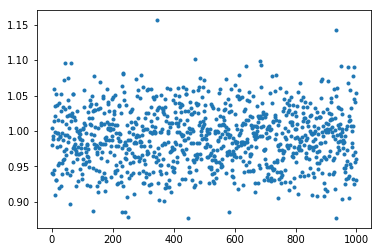

In [428]:
s = []
for i in range(1000):
    x = np.random.normal(size=(2, 500))#.view(np.complex128)
    z = x[0, :] * x[1, :]
    y, x = np.histogram(z.real, bins='auto', density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0
    popt, pcov = curve_fit(real_cnn_dist, x, y, p0=[1])
    s.append(popt[0])
plt.plot(np.linspace(0, len(s)-1, len(s)), s, '.')